![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [7]:
warnings.filterwarnings("ignore")

filename_features = "features.txt"
filename_labels = "activity_labels.txt"

filename_subtrain = "subject_train.txt"
filename_xtrain = "X_train.txt"
filename_ytrain = "y_train.txt"

filename_subtest = "subject_test.txt"
ffilename_xtest = "X_test.txt"
filename_ytest = "y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [16]:
%%time

clf = DecisionTreeClassifier(ccp_alpha=0.001).fit(X_train, y_train)

Wall time: 2.56 s


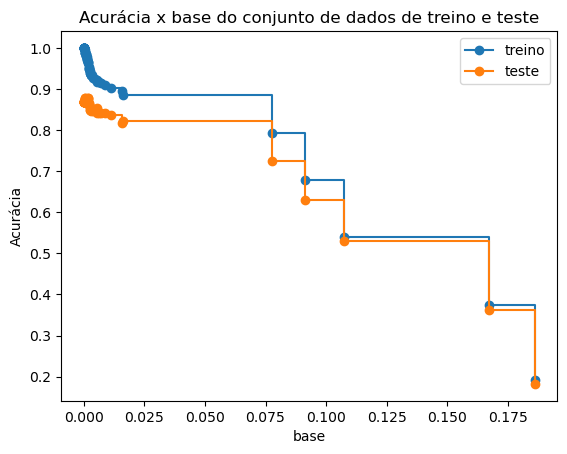

Wall time: 1.34 s


In [18]:
%%time

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("base")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x base do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [20]:
%%time
prcomp = PCA(n_components=1).fit(X_train)
pc_treino  = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 272 ms


(5514, 1)

In [23]:
%%time
n=1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.head()

Wall time: 0 ns


,cp1
0,5.528346
1,6.281671
2,-5.457771
3,7.124429
4,13.852336


In [24]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

Wall time: 2.86 s


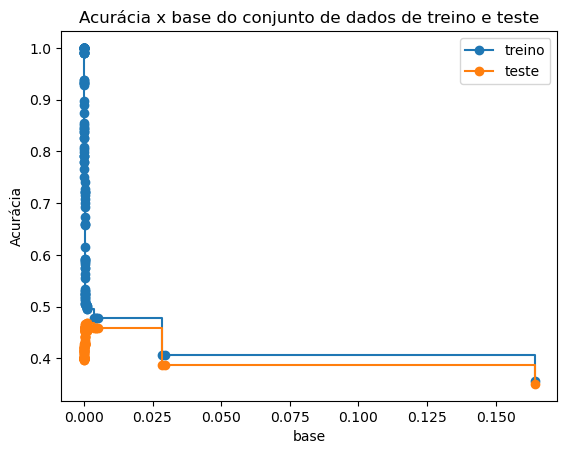

Wall time: 644 ms


In [25]:
%%time

train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("base")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x base do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [37]:
%%time
prcomp = PCA(n_components=2).fit(X_train)
pc_treino  = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 558 ms


(5514, 2)

In [38]:
n=2

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1,cp2
0,5.528346,-0.421785
1,6.281671,-1.059075
2,-5.457771,0.845833
3,7.124429,0.280161
4,13.852336,5.775000


In [39]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

Wall time: 3.36 s


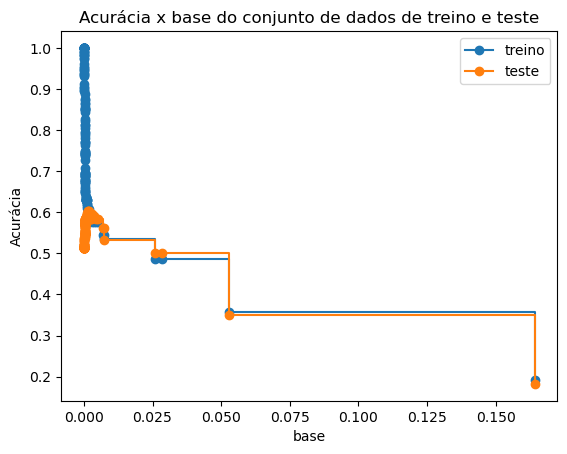

Wall time: 884 ms


In [40]:
%%time

train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("base")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x base do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

# 5 componentes

In [46]:
%%time
prcomp = PCA(n_components=5).fit(X_train)
pc_treino  = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 190 ms


(5514, 5)

In [42]:
n=5

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1,cp2,cp3,cp4,cp5
0,5.528346,-0.421785,0.388243,0.298536,-0.557816
1,6.281671,-1.059075,0.108541,-0.723152,1.376762
2,-5.457771,0.845833,-1.792834,-0.041465,-0.076311
3,7.124429,0.280161,0.591990,-1.174232,1.498727
4,13.852336,5.775000,0.429917,2.013055,0.889456


In [43]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

Wall time: 3.08 s


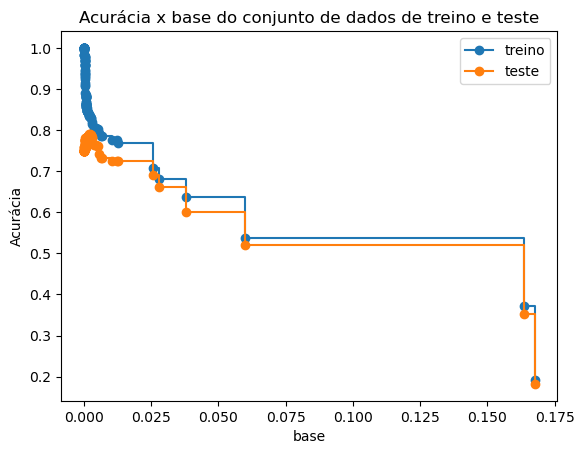

Wall time: 496 ms


In [44]:
%%time

train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("base")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x base do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

# 10 componentes

In [47]:
%%time
prcomp = PCA(n_components=10).fit(X_train)
pc_treino  = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 182 ms


(5514, 10)

In [48]:
n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,5.528346,-0.421785,0.388243,0.298540,-0.557818,-0.916550,0.141101,-1.223573,-1.092727,-0.307628
1,6.281671,-1.059075,0.108541,-0.723160,1.376767,-0.162341,-0.892521,0.403168,0.619678,1.107500
2,-5.457771,0.845833,-1.792834,-0.041464,-0.076309,-0.158596,-0.922834,0.052626,0.279032,-0.485213
3,7.124429,0.280161,0.591990,-1.174237,1.498738,-1.058740,1.048010,-0.773308,0.405008,-1.359114
4,13.852336,5.775000,0.429917,2.013054,0.889457,1.920052,-1.646062,2.335878,1.053605,0.572451


In [49]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

Wall time: 5.09 s


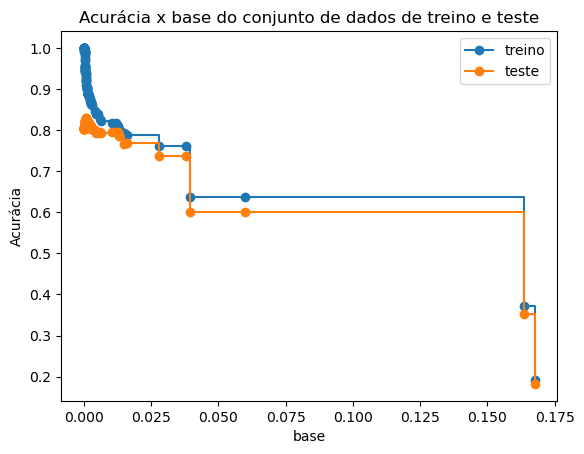

Wall time: 597 ms


In [50]:
%%time

train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("base")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x base do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

# 50 componentes

In [51]:
%%time
prcomp = PCA(n_components=50).fit(X_train)
pc_treino  = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 352 ms


(5514, 50)

In [52]:
n=50

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10,...,cp41,cp42,cp43,cp44,cp45,cp46,cp47,cp48,cp49,cp50
0,5.528346,-0.421785,0.388243,0.298540,-0.557818,-0.916556,0.141087,-1.223310,-1.092812,-0.308147,...,-0.320602,-0.271887,-0.008361,0.200408,0.352393,-0.233408,-0.199294,0.035066,0.357036,0.152345
1,6.281671,-1.059075,0.108541,-0.723159,1.376769,-0.162366,-0.892503,0.403471,0.619419,1.107451,...,0.058127,0.300386,-0.228905,-0.256862,-0.475878,-0.665846,-0.167844,0.120871,-0.152243,-0.083137
2,-5.457771,0.845833,-1.792834,-0.041463,-0.076309,-0.158597,-0.922768,0.052137,0.279106,-0.481677,...,0.299701,0.235076,0.103275,0.161486,-0.058936,-0.357232,-0.514065,0.032119,0.146766,0.078475
3,7.124429,0.280161,0.591990,-1.174239,1.498734,-1.058735,1.047938,-0.772740,0.404945,-1.363694,...,-0.103643,0.355001,-0.580869,0.156861,-0.261899,0.215820,0.105238,-0.012700,0.432946,-0.143713
4,13.852336,5.775000,0.429917,2.013054,0.889459,1.920035,-1.646140,2.336357,1.053479,0.569903,...,0.690740,0.134396,-1.150370,0.643025,-0.298075,-0.790902,-0.836576,-0.162823,0.216100,0.265217


In [53]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

Wall time: 28.3 s


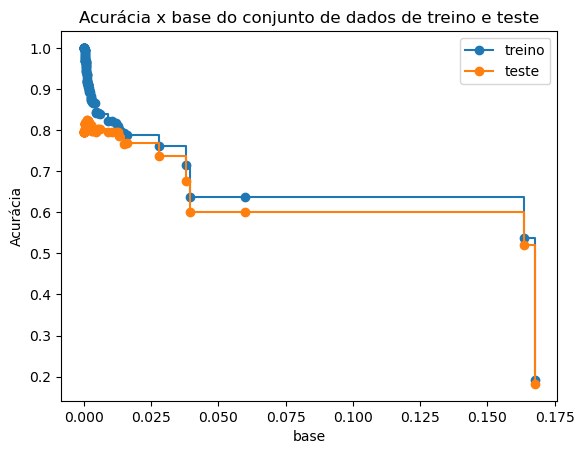

Wall time: 655 ms


In [54]:
%%time

train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("base")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x base do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

A acuracia dos modelos de 5,10 e 50 componentes ficaram bastante parecidos, senão iguais. È a acuracia do modelo com 1 e 2 componentes ficaram similares, com a base de teste em destaque.

O tempo de processamento continuou pequeno.